# Root finding with the Newton-Raphson method
This notebook visually demonstrates the Newton-Raphson method

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

Unlike the bisection method, which only required a continuous function, the Newton-Raphson method requires the function and its derivative. In the first example we'll use a quadratic with roots at $x=\{-3,2\}$

In [33]:
def f(x):
    return (x-2)*(x+3)

def df(x):
    return 2*x + 1

The below function is a modification of the one we looked at in the lectures which also plots the steps of the method

In [34]:
# Function that plots the steps of the Newton-Raphson method
# f - the function
# df - the derivative of the function
# nmax - the maximum number of steps to take
# plotxmin - the minimum x-value used when plotting the function
# plotxmax - the maximum x-value used when plotting the function
def FindRootNewtonRaphson(f, df, x0, nmax, plotxmin, plotxmax):
    x = np.arange(plotxmin, plotxmax, 0.01)
    vf = np.vectorize(f)
    vdf = np.vectorize(df)
    y = vf(x)
    
    #plt.rcParams['figure.figsize'] = 10, 7
    plt.grid(True)    
    plt.plot(x, y, 'r')
    
    f0 = f(x0)
    
    xn = x0
    
    n = 0
    while n < nmax:
        f0 = f(xn)
        df0 = df(xn)
        
        if(np.abs(df0) < 1e-15):
            print("Division by zero detected for f'(x_%d)" % n)
            return None
        
        xn1 = xn - f0/df0  
        print("At iteration x_%d = %.16f" % (n, xn1))
        
        if(xn1 > xn):
            xmax = xn1
            xmin = xn
        else:
            xmax = xn
            xmin = xn1
        
        xtangent = np.arange(xmin, xmax, 0.01)
        
        tangent = f0 + df0*(xtangent - xn)
        plt.vlines(x=xn1, ymin=0, ymax=f(xn1), colors='black', linestyles = 'dashed')
        plt.plot(xtangent, tangent, 'b' )
        
        xn = xn1
        
        n += 1
        
        

    return xn

At iteration x_0 = 6.0000000000000000
At iteration x_1 = 3.2307692307692308
At iteration x_2 = 2.2030134813639970
At iteration x_3 = 2.0076238009724490


2.007623800972449

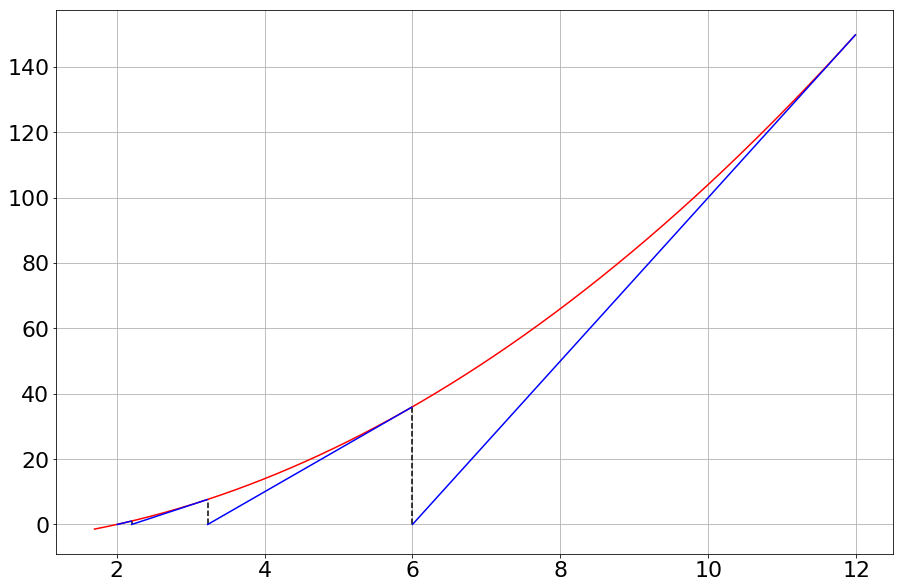

In [35]:
FindRootNewtonRaphson(f, df, 12, 4, 1.7, 12)

Let's define a new function (and its derivative) to investigate cases where the method does not converge. For this we'll use $f(x) = \sinh^{-1} x$. This function has a root at $x=0$.

In [23]:
def ArcSinh(x):
    return np.arcsinh(x)

In [24]:
def dArcSinh(x):
    return 1/np.sqrt(1 + x**2)

If we start the method with an initial value near the root it converges

At iteration x_0 = -1.9353055993267247
At iteration x_1 = 1.1456499121600103
At iteration x_2 = -0.3457089572277832
At iteration x_3 = 0.0131556966755410


0.013155696675540951

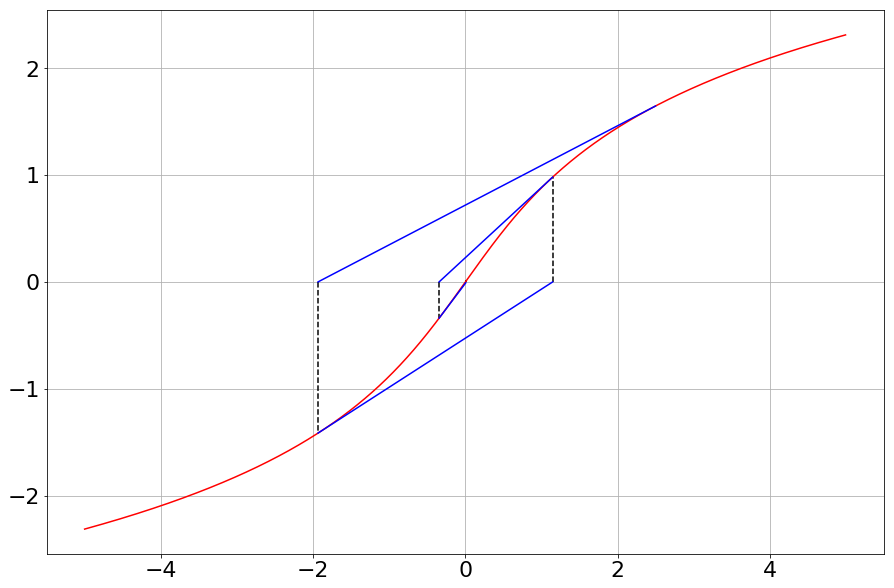

In [36]:
FindRootNewtonRaphson(ArcSinh, dArcSinh, 2.5, 4, -5, 5)

We can find a value of the initial guess where the method diverges. As we iterate more the result gets further from the root!

At iteration x_0 = -3.4678616578019885
At iteration x_1 = 3.5947442192739580
At iteration x_2 = -3.8357611794740838
At iteration x_3 = 4.3065888908388033
At iteration x_4 = -5.2719030676225511


-5.271903067622551

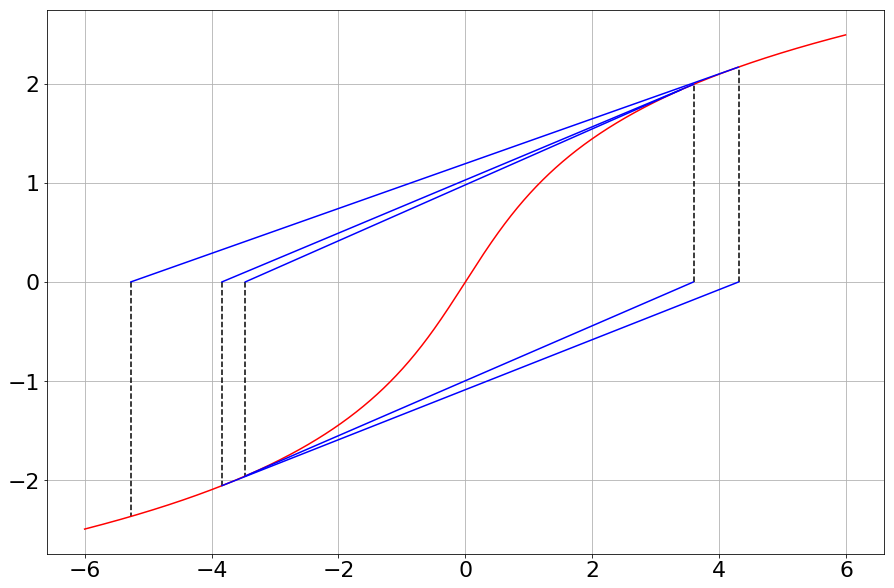

In [39]:
FindRootNewtonRaphson(ArcSinh, dArcSinh, 3.4, 5, -6, 6)

Between the two cases above there is a critical value where the method just loops between $\{x_0, F(x_0), x_0, F(x_0),\dots\}$ where $F(x) = x - f(x)/f'(x)$. This is a period-2 orbit of the map $F(x)$.

At iteration x_0 = -3.3198263863951483
At iteration x_1 = 3.3198263863951483
At iteration x_2 = -3.3198263863951483
At iteration x_3 = 3.3198263863951483
At iteration x_4 = -3.3198263863951483
At iteration x_5 = 3.3198263863951483


3.3198263863951483

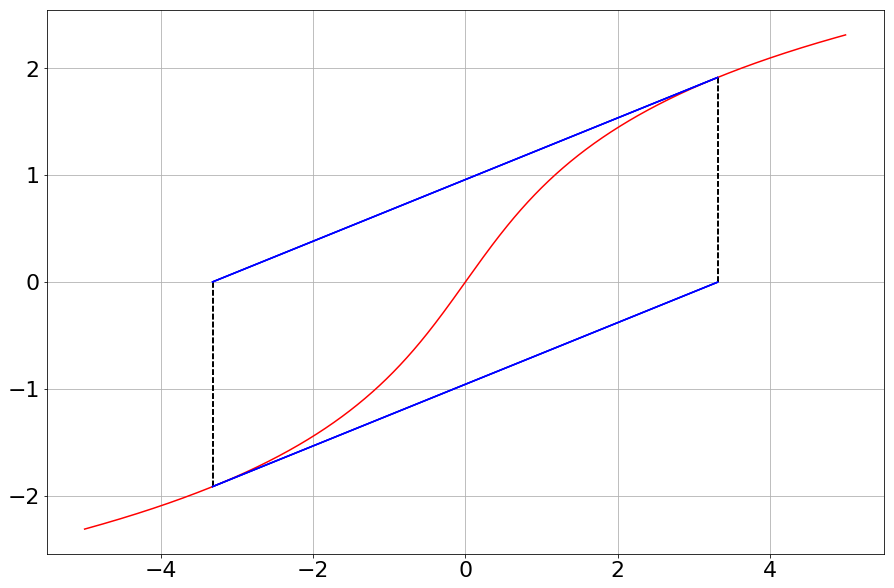

In [40]:
FindRootNewtonRaphson(ArcSinh, dArcSinh, 3.3198263863951484339, 6, -5, 5)

## Other failure modes
In this section we look at a few other ways the Newton-Raphson method can fail

In [16]:
def f(x):
    return x**3 - x

def df(x):
    return 3*x**2 - 1

At iteration x_0 = 1.4545454545454546
At iteration x_1 = 1.1510467893775467
At iteration x_2 = 1.0253259289766978
At iteration x_3 = 1.0009084519430513
At iteration x_4 = 1.0000012353089454


1.0000012353089454

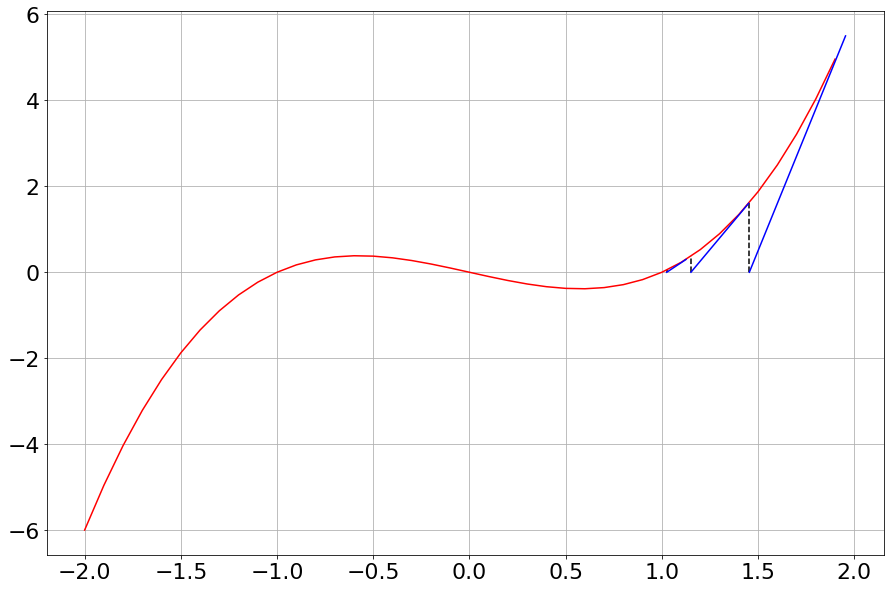

In [17]:
FindRootNewtonRaphson(f, df, 2, 5, -2, 2)

This function has turning points at $x = \pm 1/\sqrt{3}$. If we choose either of these as an initial guess the method will fail as $x_{n+1} = x_n - f(x_n)/f'(x_n)$ and at the turning points $f'(x_0) = 0$. The code prints an error at this value:

Division by zero detected for f'(x_0)


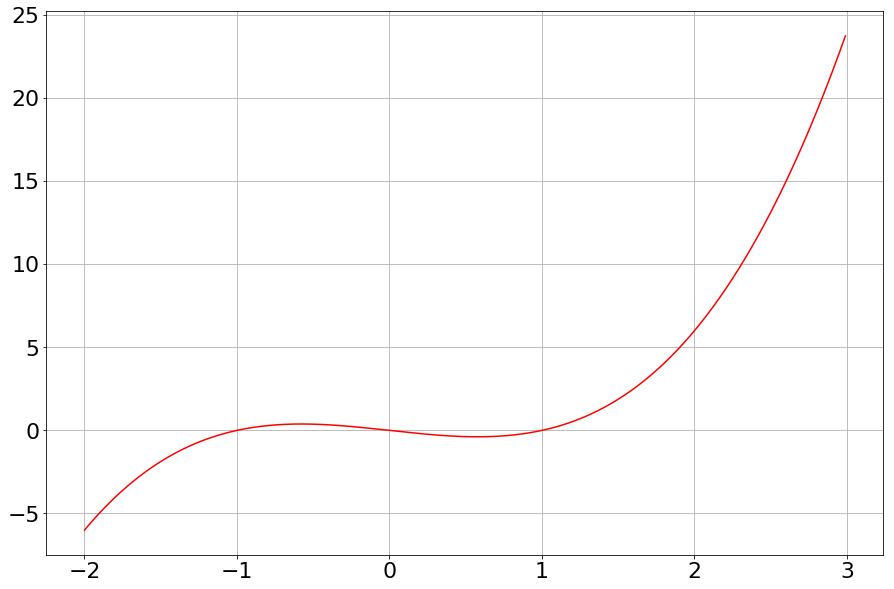

In [67]:
root = FindRootNewtonRaphson(f, df, 1/np.sqrt(3) ,9, -2, 3)

Perturbing the initial value makes the method work

At iteration x_0 = 2.7326870469233993
At iteration x_1 = 1.9069109216707729
At iteration x_2 = 1.3995697608875286
At iteration x_3 = 1.1243862417746686
At iteration x_4 = 1.0179984262512223
At iteration x_5 = 1.0004663387973478
At iteration x_6 = 1.0000003258532462
At iteration x_7 = 1.0000000000001592
At iteration x_8 = 1.0000000000000000


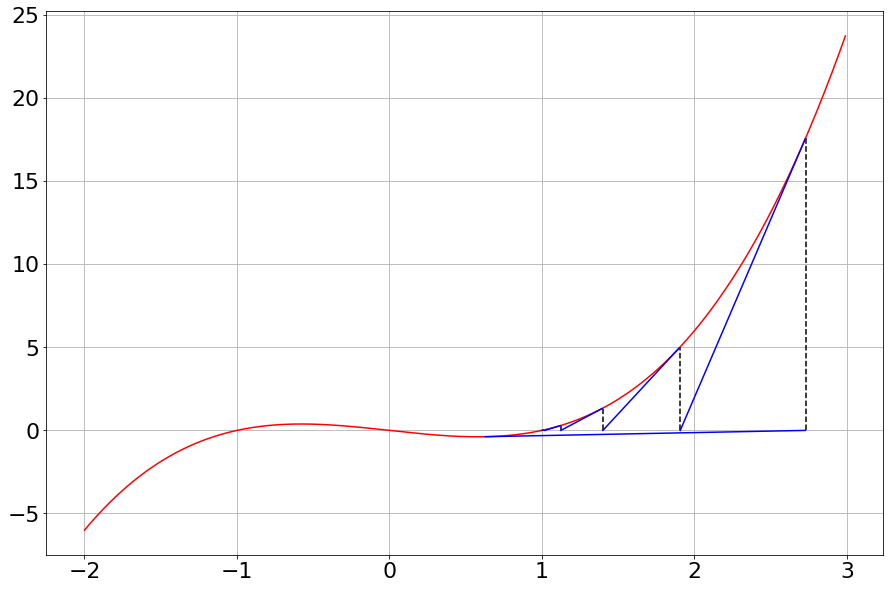

In [68]:
root = FindRootNewtonRaphson(f, df, 1/np.sqrt(3) + 0.05 ,9, -2, 3)

Below is another example of a period-2 orbit, as we discussed in the lectures.

At iteration x_0 = -0.4472135954999579
At iteration x_1 = 0.4472135954999579
At iteration x_2 = -0.4472135954999579
At iteration x_3 = 0.4472135954999579
At iteration x_4 = -0.4472135954999579


-0.4472135954999579

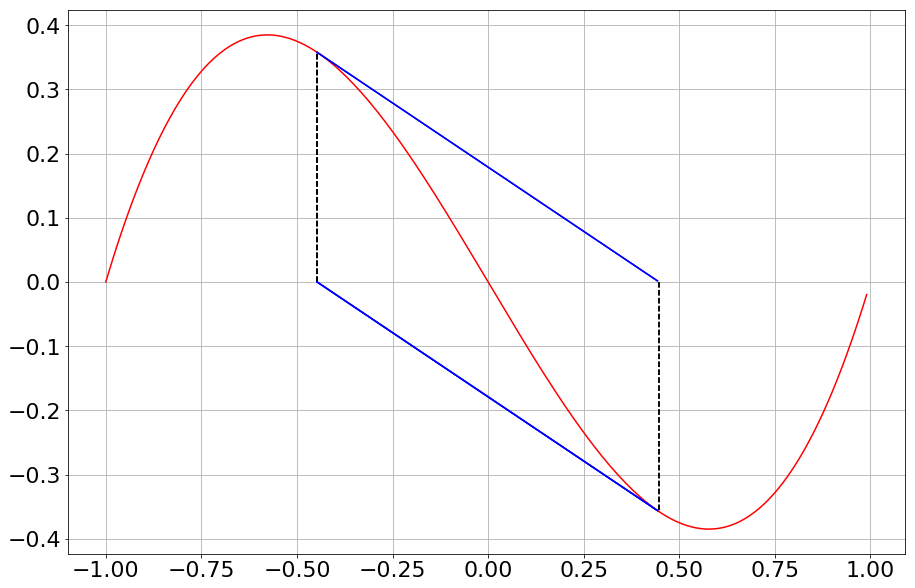

In [25]:
FindRootNewtonRaphson(f, df, 1/np.sqrt(5), 5, -1, 1)

# One-dimensional maps and cobweb diagrams
One way to analyse the behaviour of the Newton-Raphson method to view the algortihm as a one-dimensional map.  From these perspective we can construct cobweb diagrams. Below is some code that will plot the cobweb for a given function.

In [29]:
def PlotCobWeb(F, x0, nmax, xmin, xmax, ymin, ymax):
    x = np.arange(xmin, xmax, 0.01)
    y = np.vectorize(F)(x)
    plt.ylim(ymin, ymax)
    plt.plot(x,y);
    plt.grid(True)
    plt.ylabel('F(x)')
    plt.xlabel('x')
    plt.plot(x,x)
    
    plt.vlines(x=x0, ymin=ymin, ymax=F(x0), colors='black', linestyles = 'dashed')
    n = 1
    while n <= nmax:
        F0 = F(x0)
        x = np.linspace(x0, F0, 100)
        y = np.full(x.size, F0)
        plt.plot(x,y, '--k')
        plt.vlines(x=F0, ymin=F0, ymax=F(F0), colors='black', linestyles = 'dashed')
        
        x0 = F0
        n += 1

Let's now look at the roots of $f(x) = x^3 - x$. This has roots at $x=\{-1,0,+1\}$.

In [30]:
def f(x):
    return x**3 - x

def df(x):
    return 3*x**2 - 1

def F(x):
    return x - f(x)/df(x)

Here is an example of the method converging to the fixed point at $x=0$ (recall that fixed points of this map are roots of the original $f(x)$ equation)

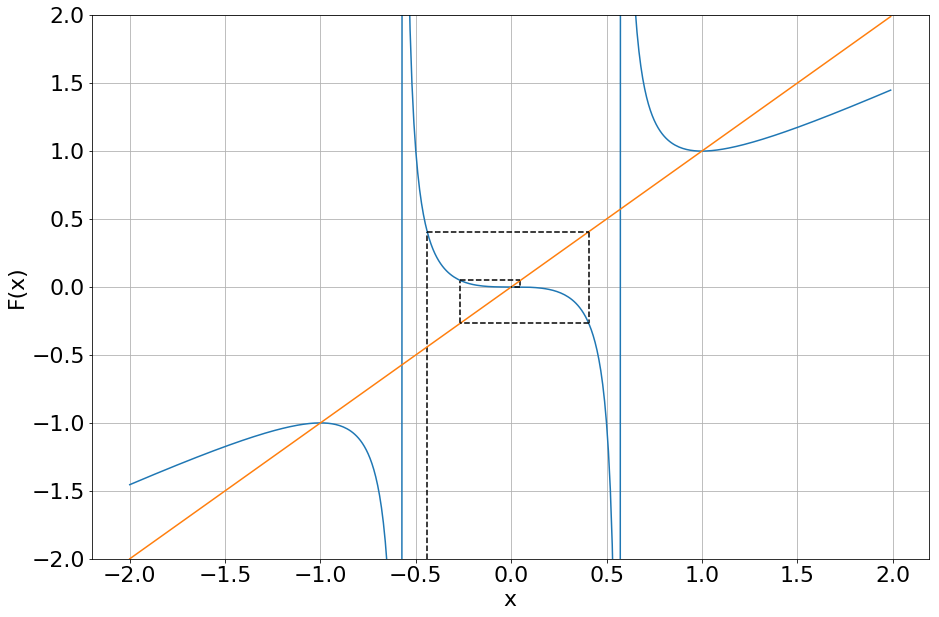

In [33]:
PlotCobWeb(F, -0.44, 5, -2, 2, -2, 2)

Below is an example of the cobweb algorithm converging to the fixed point at $x=-1$

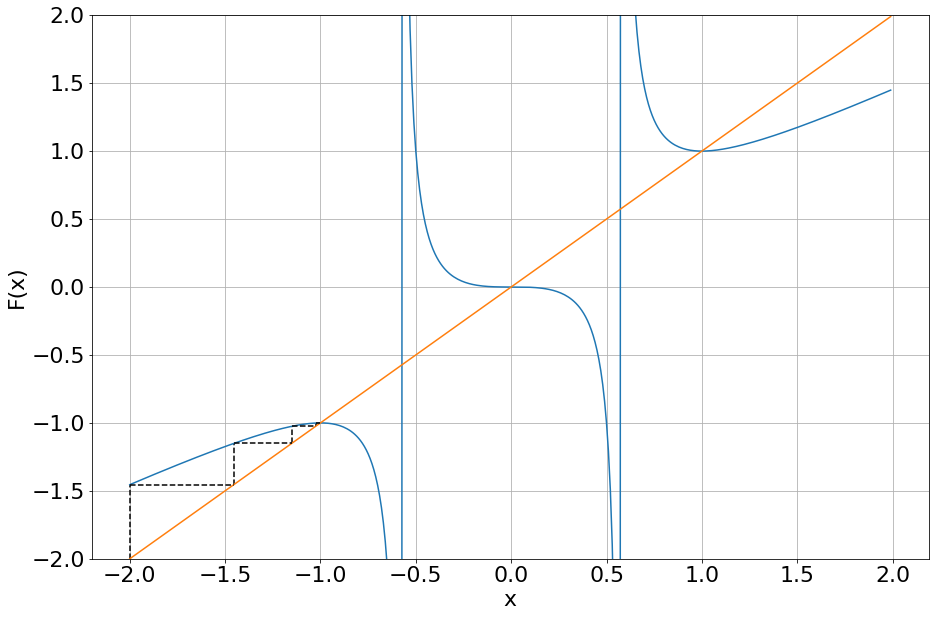

In [36]:
PlotCobWeb(F, -2, 5, -2, 2, -2, 2)

By Solving $F(F(x)) = x$ we found in the lecture that $F(x)$ has a period-2 orbit at $x = \pm1/\sqrt{5}$. Using this value for $x_0$ we can clearly see this on the cobweb diagram.

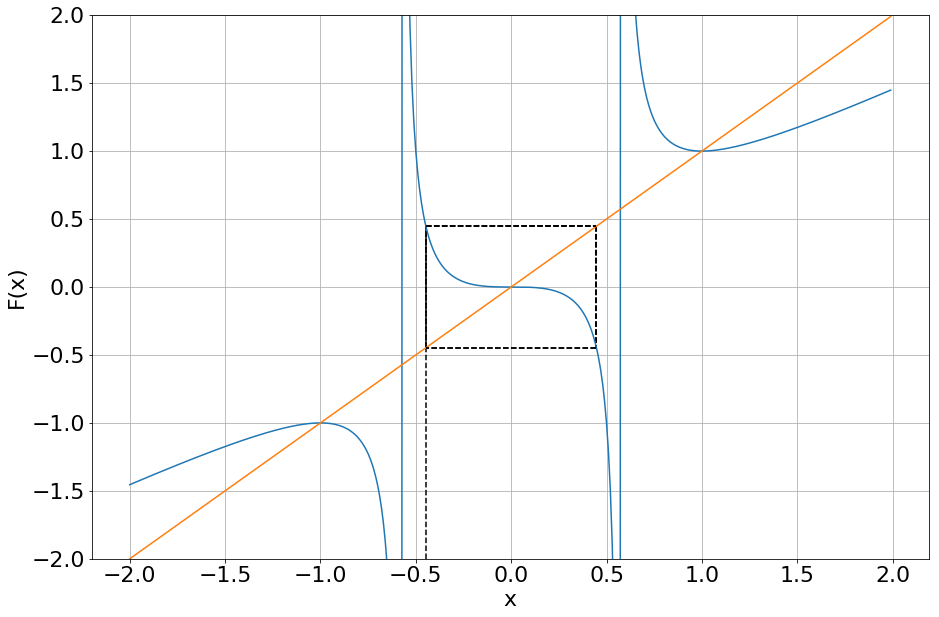

In [30]:
PlotCobWeb(F, -1/np.sqrt(5), 5, -2, 2, -2, 2)

Below is an example of function and start value for which the Newton-Raphson method has a period-3 orbit, i.e., $F(F(F(x)) = x$

In [ ]:
def g(x):
    return -1.4917462364696471124 + x - x**3

def dg(x):
    return 1 - 3*x**2

def G(x):
    return x - g(x)/dg(x)

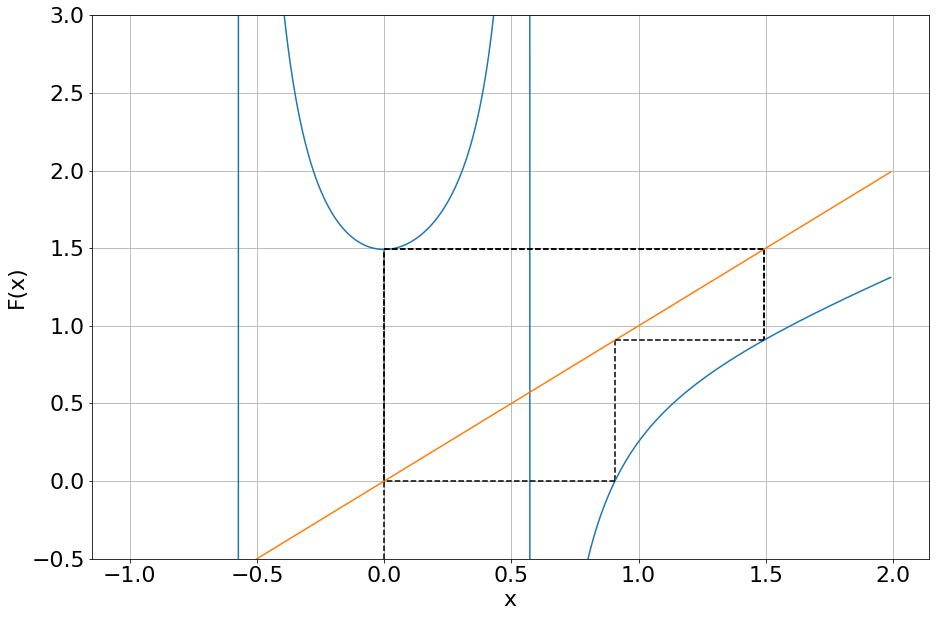

In [58]:
x0 = 0
PlotCobWeb(G, x0, 4, -1,2, -0.5, 3)

Zooming out on the cobweb diagram, or by plotting the function, we see that the function has a root near $x=-1.5$. Picking an initial value near here results in convergence of the Newton-Raphson method

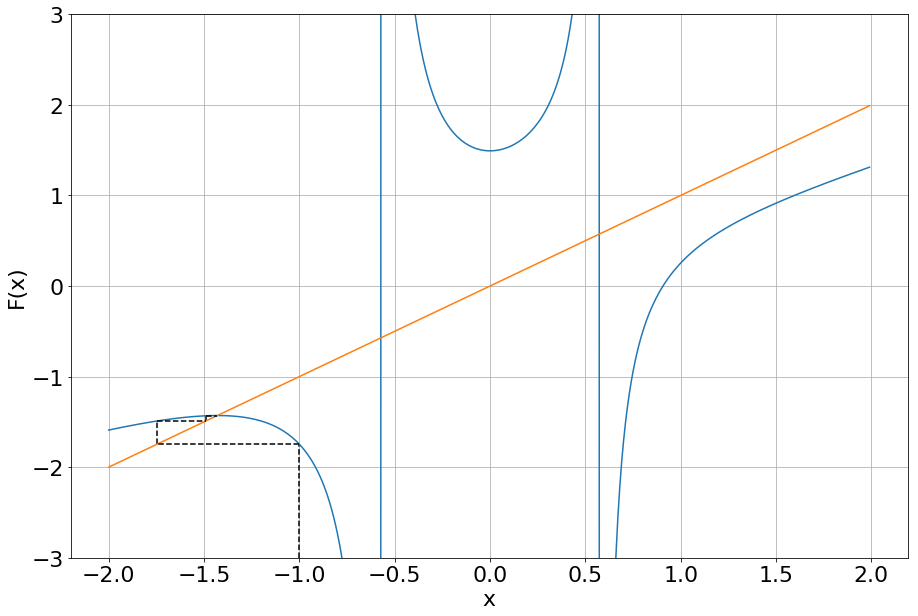

In [57]:
x0 = -1
PlotCobWeb(G, x0, 4, -2, 2, -3, 3)